In [4]:
# Importing necessary packages
import pandas as pd
import numpy as np

In [5]:
# Assigning data frame to df
df = pd.read_csv("https://raw.githubusercontent.com/waitasecant/Insurance-Claims-Fraud-/main/insurance_data.csv")
df.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [6]:
# Silencing SettingWithCopy warning
pd.options.mode.chained_assignment = None

In [7]:
# Note: There are null values in our data
# df.isnull().sum()

In [8]:
# Normalizing the column names
df = df.loc[0:,['TRANSACTION_ID', 'CUSTOMER_ID', 'AGENT_ID', 'VENDOR_ID', 'POLICY_NUMBER',
    'CUSTOMER_NAME', 'AGE', 'STATE', 'INCIDENT_STATE', 'CITY', 'INCIDENT_CITY', 'POSTAL_CODE',
    'CLAIM_AMOUNT', 'CLAIM_STATUS', 'PREMIUM_AMOUNT', 'TENURE', 'ACCT_NUMBER', 'SSN',
    'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'NO_OF_FAMILY_MEMBERS', 'HOUSE_TYPE', 'SOCIAL_CLASS',
    'CUSTOMER_EDUCATION_LEVEL','ADDRESS_LINE1', 'ADDRESS_LINE2', 'RISK_SEGMENTATION',
    'INCIDENT_SEVERITY', 'INSURANCE_TYPE', 'AUTHORITY_CONTACTED','ANY_INJURY',
    'POLICE_REPORT_AVAILABLE', 'TXN_DATE_TIME', 'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT',
    'ROUTING_NUMBER', 'INCIDENT_HOUR_OF_THE_DAY']]

df = df.rename(columns = {'TRANSACTION_ID':'TXN_ID', 'CUSTOMER_ID':'Customer_ID', 'AGENT_ID':'Agent_ID',
    'VENDOR_ID':'Vendor_ID', 'POLICY_NUMBER':'Policy_No', 'CUSTOMER_NAME':'Customer_Name', 'AGE':'Age',
    'STATE':'State', 'INCIDENT_STATE':'Incident_State', 'CITY':'City', 'INCIDENT_CITY':'Incident_City',
    'POSTAL_CODE':'Postal_Code', 'CLAIM_AMOUNT':'Claim_Amt', 'CLAIM_STATUS':'Claim_Status',
    'PREMIUM_AMOUNT':'Premium_Amt', 'TENURE':'Tenure', 'ACCT_NUMBER':'Account_No', 'SSN':'SSN',
    'EMPLOYMENT_STATUS':'Employment', 'MARITAL_STATUS': 'Married', 'NO_OF_FAMILY_MEMBERS':'Family',
    'HOUSE_TYPE':'House', 'SOCIAL_CLASS':'Social_Class', 'CUSTOMER_EDUCATION_LEVEL':'Ed',
    'ADDRESS_LINE1':'Address1', 'ADDRESS_LINE2':'Address2', 'RISK_SEGMENTATION':'Risk',
    'INCIDENT_SEVERITY':'Severity', 'INSURANCE_TYPE':'Insurance_Type', 'AUTHORITY_CONTACTED':'Authority',
    'ANY_INJURY':'Injury', 'POLICE_REPORT_AVAILABLE':'Policy_Report', 'TXN_DATE_TIME':'TXN_DT',
    'POLICY_EFF_DT':'Policy_DT', 'LOSS_DT':'Loss_DT', 'REPORT_DT':'Report_DT',
    'ROUTING_NUMBER':'Routing_No', 'INCIDENT_HOUR_OF_THE_DAY':'Incident_Hour'})

In [9]:
def remove_zeros(df, k):
    for i in range(4):
        lst = []
        for d in df[k]:
            if d[0] == "0":
                lst.append(d[1:])
            else:
                lst.append(d)
        df[k]= lst
    df[k] = np.int64(df[k])

In [10]:
# Extracting indexes from TRANSACTION_ID
df["TXN_ID"] = [d[6:11] for d in df["TXN_ID"]]
remove_zeros(df, "TXN_ID")

# Extracting indexes from CUSTOMER_ID
df["Customer_ID"] = [d[4:9] for d in df["Customer_ID"]]
remove_zeros(df, "Customer_ID")

# Extracting indexes from POLICY_NUMBER
df["Policy_No"] = [d[6:11] for d in df["Policy_No"]]
remove_zeros(df, "Policy_No")

# Extracting indexes from AGENT_ID
df["Agent_ID"] = [d[5:10] for d in df["Agent_ID"]]
remove_zeros(df, "Agent_ID")

In [11]:
# Check for that Customer and TXN IDs and Policy Number are actually numbers from 1 to 10000
print(df["Customer_ID"].sum() == sum([int(i) for i in range(10001)]))
print(df["TXN_ID"].sum() == sum([int(i) for i in range(10001)]))
print(df["Policy_No"].sum() == sum([int(i) for i in range(10001)]))

True
True
True


In [12]:
df["Customer_Name"].value_counts()
df.loc[:,["TXN_ID", "Customer_ID", "Customer_Name", "Policy_No"]][df["Customer_Name"]=="William Johnson"]

,TXN_ID,Customer_ID,Customer_Name,Policy_No
1824,1825,8924,William Johnson,5691
4490,4491,4679,William Johnson,2809
6099,6100,2285,William Johnson,2924
9397,9398,9510,William Johnson,3136


In [13]:
# There are repetative names for different customers for distinct Customer ID available
# hence dropping Customer_Name
df = df.drop("Customer_Name", axis = 1)

In [14]:
# ALmost 85% of data for Address2 is not available hence dropping Address2
print(df["Address2"].isnull().sum()/100)
df = df.drop("Address2", axis = 1)
df = df.rename(columns = {"Address1":"Address"})

85.05


In [15]:
# Binarize the Y/N Categorical data
df["Married"] = df["Married"].replace({"Y":1, "N":0})
df["Employment"] = df["Employment"].replace({"Y":1, "N":0})
df["Claim_Status"] = df["Claim_Status"].replace({"A":1, "D":0})

In [16]:
# Since SSN is not included in employee_data.csv and vendor_data.csv, hence dropping SSN
df = df.drop("SSN", axis = 1)

In [17]:
# There are null values in City let's impute them
df["City"].isnull().sum()

54

In [18]:
# Data frame containing rows for which City has null values
df_city_null = df.loc[:,["TXN_ID","City", "Postal_Code"]][df["City"].isnull()==True]
print(df_city_null.shape)
df_city_null.head()

(54, 3)


,TXN_ID,City,Postal_Code
55,56,NaN,5149
160,161,NaN,21226
174,175,NaN,5733
977,978,NaN,5156
1200,1201,NaN,5468


In [19]:
df_city_null.iloc[53,0]

9704

In [20]:
df_new = df_city_null.drop([df_city_null.iloc[i,0]-1 for i in range(53)], axis = 0)
df_new

,TXN_ID,City,Postal_Code
9703,9704,NaN,21226


In [21]:
# Data frame containing rows for which City has non-null values (df - df_city_null)
df_city = df.loc[:,["TXN_ID", "City", "Postal_Code"]].drop([df_city_null.iloc[i,0]-1 for i in range(54)], axis = 0)
# print(df_city.shape)
# df_city.head()

In [22]:
# Returns the nearest postal code in df_city for postal code in df_city_null
def nearest_postal_code(x):
    l = [abs(x-i) for i in df_city["Postal_Code"]]
    id = min(l)
    d = {}
    for i in df_city["Postal_Code"]:
        d[abs(x-i)]=  i
    return d.get(id)

In [23]:
# Returns the corresponding city in df_city for postal code in df_city
def corresponding_city(x):
    for i,j in zip(df_city["Postal_Code"],range(len(df_city["Postal_Code"]))):
        if i == x:
            return df_city.iloc[j,1]

In [24]:
# Making a copy of our original data frame
df_copy = df.copy()
df_city_null.iloc[0,0]-1

55

In [25]:
# Imputes city names using postal code data
for i,j in zip(df_city_null["Postal_Code"], range(54)):
    code = nearest_postal_code(i)
    city = corresponding_city(code)
    df_copy.loc[df_city_null.iloc[j,0]-1, "City"] = city

In [26]:
# Replacing values of df2 with original data frame df
df = df_copy
df["City"].isnull().sum()

0

In [27]:
# There are 529 null values in Ed which can be imputed using Social Class and Employment
# We will look at which of the them will be best suited for imputation 
df["Ed"].isnull().sum()

529

In [28]:
for i in ["High School", "College", "Bachelor", "Masters", "MD", "PhD"]:
    print(f"Percent of LI, MI, HI with {i} Ed")
    print("LI ",round((df.loc[:,"Social_Class"][df["Ed"] == i] == "LI").sum()/(df["Social_Class"] == "LI").sum(),6))
    print("MI ",round((df.loc[:,"Social_Class"][df["Ed"] == i] == "MI").sum()/(df["Social_Class"] == "MI").sum(),6))
    print("HI ",round((df.loc[:,"Social_Class"][df["Ed"] == i] == "HI").sum()/(df["Social_Class"] == "HI").sum(),6), "\n")

Percent of LI, MI, HI with High School Ed
LI  0.238724
MI  0.249479
HI  0.217023 

Percent of LI, MI, HI with College Ed
LI  0.110378
MI  0.096579
HI  0.109318 

Percent of LI, MI, HI with Bachelor Ed
LI  0.40374
MI  0.393408
HI  0.405002 

Percent of LI, MI, HI with Masters Ed
LI  0.099377
MI  0.108052
HI  0.103267 

Percent of LI, MI, HI with MD Ed
LI  0.049138
MI  0.054652
HI  0.057685 

Percent of LI, MI, HI with PhD Ed
LI  0.044004
MI  0.046725
HI  0.053247 



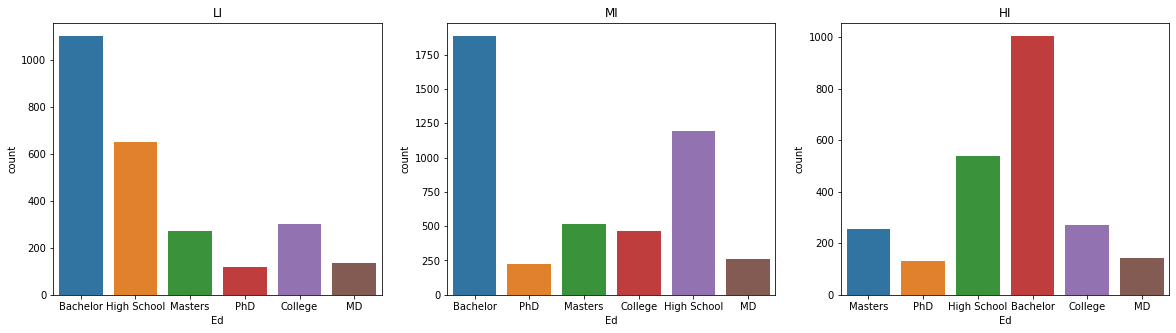

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,5))
for i,j in zip(["LI", "MI", "HI"], range(3)):
    plt.subplot(1,3,j+1)
    plt.title(i)
    sns.countplot(x = (df.loc[:,"Ed"][df["Social_Class"] == i]))

In [30]:
for i in ["High School", "College", "Bachelor", "Masters", "MD", "PhD"]:
    print(f"Percent of {i} Ed who are LI, MI, HI")
    print("LI ",round((df.loc[:,"Social_Class"][df["Ed"] == i] == "LI").sum()/(df["Ed"] == i).sum(),6))
    print("MI ",round((df.loc[:,"Social_Class"][df["Ed"] == i] == "MI").sum()/(df["Ed"] == i).sum(),6))
    print("HI ",round((df.loc[:,"Social_Class"][df["Ed"] == i] == "HI").sum()/(df["Ed"] == i).sum(),6), "\n")

Percent of High School Ed who are LI, MI, HI
LI  0.272956
MI  0.501468
HI  0.225577 

Percent of College Ed who are LI, MI, HI
LI  0.290821
MI  0.447343
HI  0.261836 

Percent of Bachelor Ed who are LI, MI, HI
LI  0.275871
MI  0.472563
HI  0.251566 

Percent of Masters Ed who are LI, MI, HI
LI  0.25933
MI  0.495694
HI  0.244976 

Percent of MD Ed who are LI, MI, HI
LI  0.248609
MI  0.486085
HI  0.265306 

Percent of PhD Ed who are LI, MI, HI
LI  0.252101
MI  0.470588
HI  0.277311 



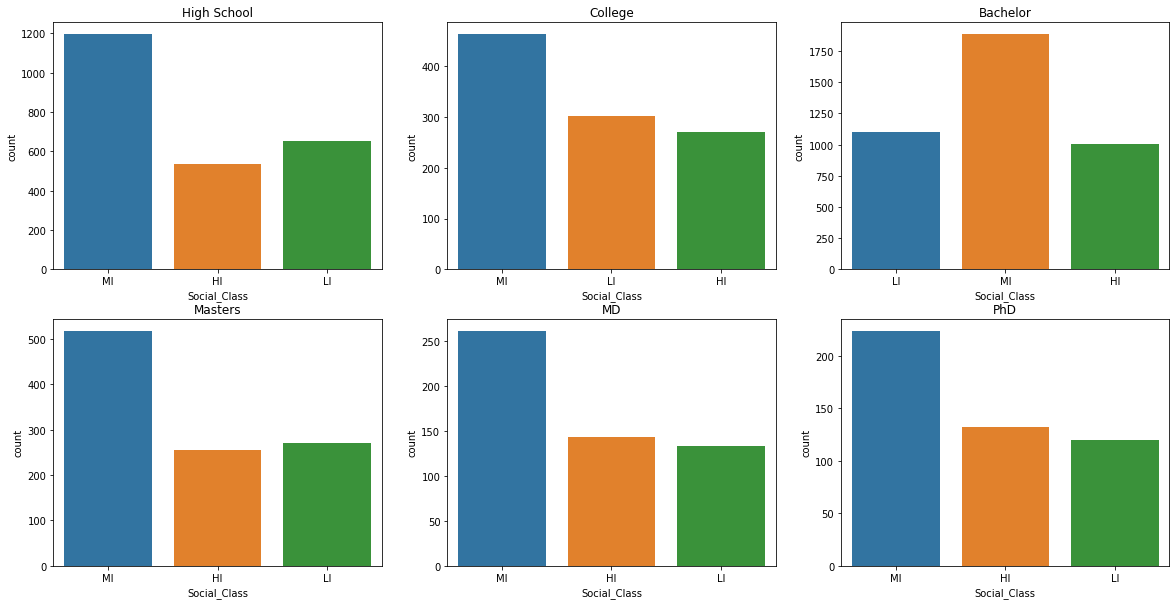

In [31]:
plt.figure(figsize = (20,10))
for i,j in zip(["High School", "College", "Bachelor", "Masters", "MD", "PhD"], range(6)):  
    plt.subplot(2,3,j+1)
    plt.title(i)
    sns.countplot(x = df.loc[:,"Social_Class"][df["Ed"] == i])

In [32]:
for i in ["High School", "College", "Bachelor", "Masters", "MD", "PhD"]:
    print(f"Percent of {i} Ed who are employed", end= ": ")
    print(round((df.loc[:,"Ed"][df["Employment"] == 1] == i).sum()/(df["Ed"] == i).sum(),6), "\n")

Percent of High School Ed who are employed: 0.92327 

Percent of College Ed who are employed: 0.924638 

Percent of Bachelor Ed who are employed: 0.911551 

Percent of Masters Ed who are employed: 0.929187 

Percent of MD Ed who are employed: 0.914657 

Percent of PhD Ed who are employed: 0.918067 



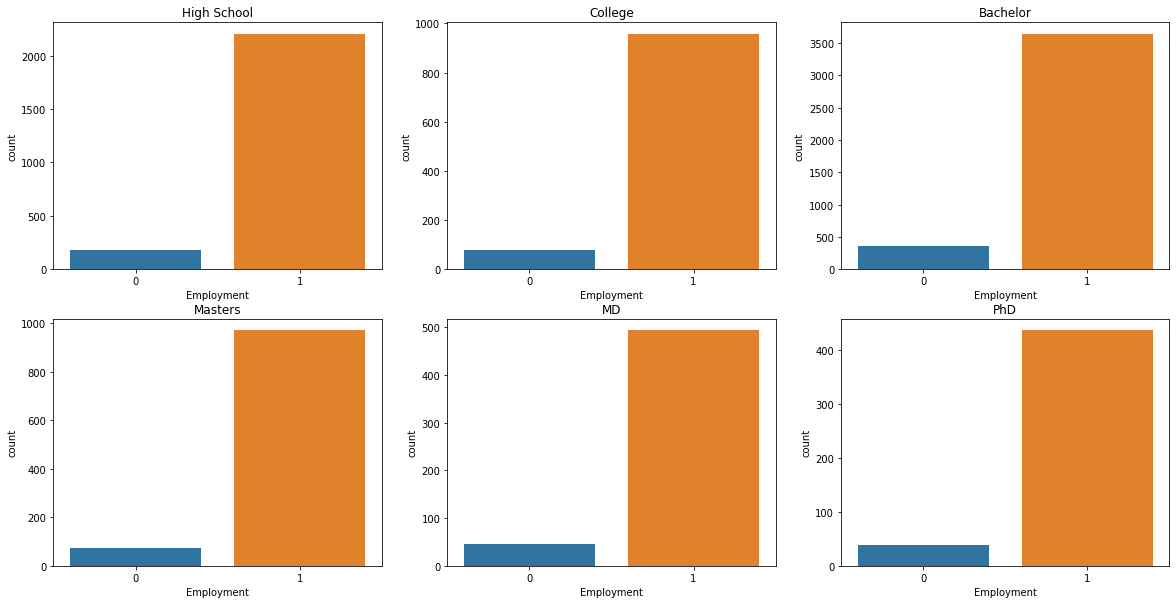

In [33]:
plt.figure(figsize = (20,10))
for i,j in zip(["High School", "College", "Bachelor", "Masters", "MD", "PhD"], range(6)):  
    plt.subplot(2,3,j+1)
    plt.title(i)
    sns.countplot(x = df.loc[:,"Employment"][df["Ed"] == i])

In [34]:
# This distribution seems most relevant to impute
for i in ["High School", "College", "Bachelor", "Masters", "MD", "PhD"]:
    print(f"Percent of Employment with {i} Ed", end= ": ")
    print(round((df.loc[:,"Employment"][df["Ed"] == i] == 1).sum()/(df["Employment"] == 1).sum(),6), "\n")

Percent of Employment with High School Ed: 0.240105 

Percent of Employment with College Ed: 0.104351 

Percent of Employment with Bachelor Ed: 0.396685 

Percent of Employment with Masters Ed: 0.105877 

Percent of Employment with MD Ed: 0.053756 

Percent of Employment with PhD Ed: 0.04765 



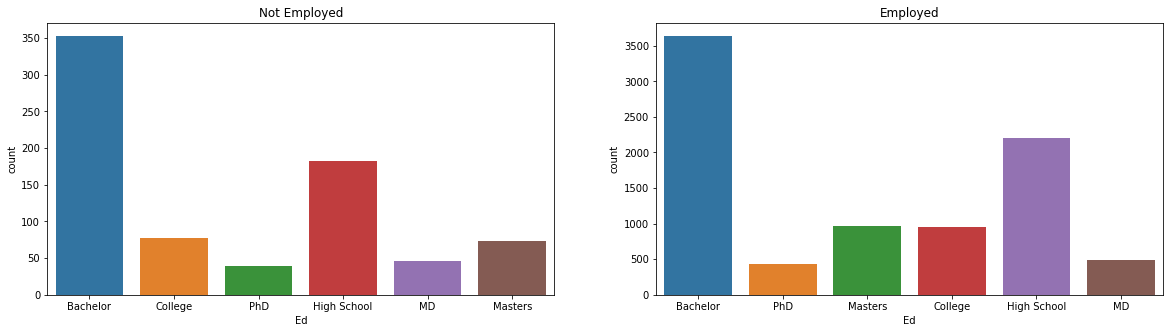

In [35]:
plt.figure(figsize = (20,5))
for i,j in zip(range(2),["Not Employed", "Employed"]):
    plt.subplot(1,2,i+1)
    plt.title(j)
    sns.countplot(x = (df.loc[:,"Ed"][df["Employment"] == i]))

In [36]:
# Creating new data frame containing rows for which education has null values
df_ed_null = df.loc[:,["TXN_ID","Ed", "Employment"]][df["Ed"].isnull()==True]
print(df_ed_null.shape)
df_ed_null.head()

(529, 3)


,TXN_ID,Ed,Employment
6,7,NaN,1
15,16,NaN,1
23,24,NaN,0
60,61,NaN,1
108,109,NaN,1


In [37]:
# Data frame containing rows for which City has non-null values (df - df_city_null)
df_ed = df.loc[:,["TXN_ID", "Ed", "Employment"]].drop([df_ed_null.iloc[i,0]-1 for i in range(529)], axis = 0)
print(df_ed.shape)
df_ed.head()

(9471, 3)


,TXN_ID,Ed,Employment
0,1,Bachelor,1
1,2,Bachelor,1
2,3,PhD,1
3,4,Masters,1
4,5,Masters,1


In [38]:
impute= np.array([])
for i in ["High School", "College", "Bachelor", "Masters", "MD", "PhD"]:
    a= (df_ed.loc[:,"Employment"][df_ed["Ed"] == i] == 1).sum()/(df_ed["Employment"] == 1).sum()
    impute= np.append(impute, int(a*529)*[i])

In [39]:
df_copy = df.copy()
df_ed_null.iloc[0,0]-1

6

In [40]:
np.random.seed(69)
for i in range(529):
    np.random.shuffle(impute)   
    df_copy.loc[df_ed_null.iloc[i,0]-1,"Ed"] = impute[0]

In [41]:
df = df_copy
df["Ed"].isnull().sum()

0

In [42]:
# There are null values in Incident City let's impute them
df["Incident_City"].isnull().sum()

46

In [43]:
# Data frame containing rows for which Incident City has null values
df_icity_null = df.loc[:,["TXN_ID","Incident_City", "City"]][df["Incident_City"].isnull()==True]
print(df_icity_null.shape)
df_icity_null.head()

(46, 3)


,TXN_ID,Incident_City,City
183,184,NaN,Panama City
304,305,NaN,Glendale
427,428,NaN,Lynn Haven
469,470,NaN,Merrimac
877,878,NaN,Arvada


In [44]:
# Data frame containing rows for which Incident City has non-null values (df - df_icity_null)
df_icity = df.loc[:,["TXN_ID", "Incident_City", "City"]].drop([df_icity_null.iloc[i,0]-1 for i in range(46)], axis = 0)
print(df_icity.shape)
df_icity.head()

(9954, 3)


,TXN_ID,Incident_City,City
0,1,Savannah,Glendale
1,2,Montgomery,Arvada
2,3,Grand Junction,Vallejo
3,4,Savannah,Thunderbolt
4,5,Nashville,Livermore


In [45]:
# Making a copy of our original data frame
df_copy = df.copy()
df_icity_null.iloc[0,0]-1

183

In [46]:
# Imputes Incident city names using corresponding city data
for j in range(46):
    df_icity_null.iloc[0,2]
    new_df = df_icity.loc[:,["Incident_City"]][df_icity.loc[:,"City"] == "Panama City"]
    l = [i for i in new_df["Incident_City"]]
    d = {}
    max = 0
    for i in new_df["Incident_City"]:
        d[l.count(i)] = i
        if l.count(i) > max:
            max = l.count(i)
    df_copy.loc[df_icity_null.iloc[j,0]-1, "Incident_City"] = d[max]


In [47]:
# Replacing values of df_copy with original data frame df
df = df_copy
df["Incident_City"].isnull().sum()

0

In [48]:
# Insurance Amount is the total money customer paid
# df["Insurance_Amt"] = 0
df = df.assign(Insurance_Amt=0)
for i in range(10000):    
    df["Insurance_Amt"][i] = df.loc[i,"Premium_Amt"]*df.loc[i,"Tenure"]

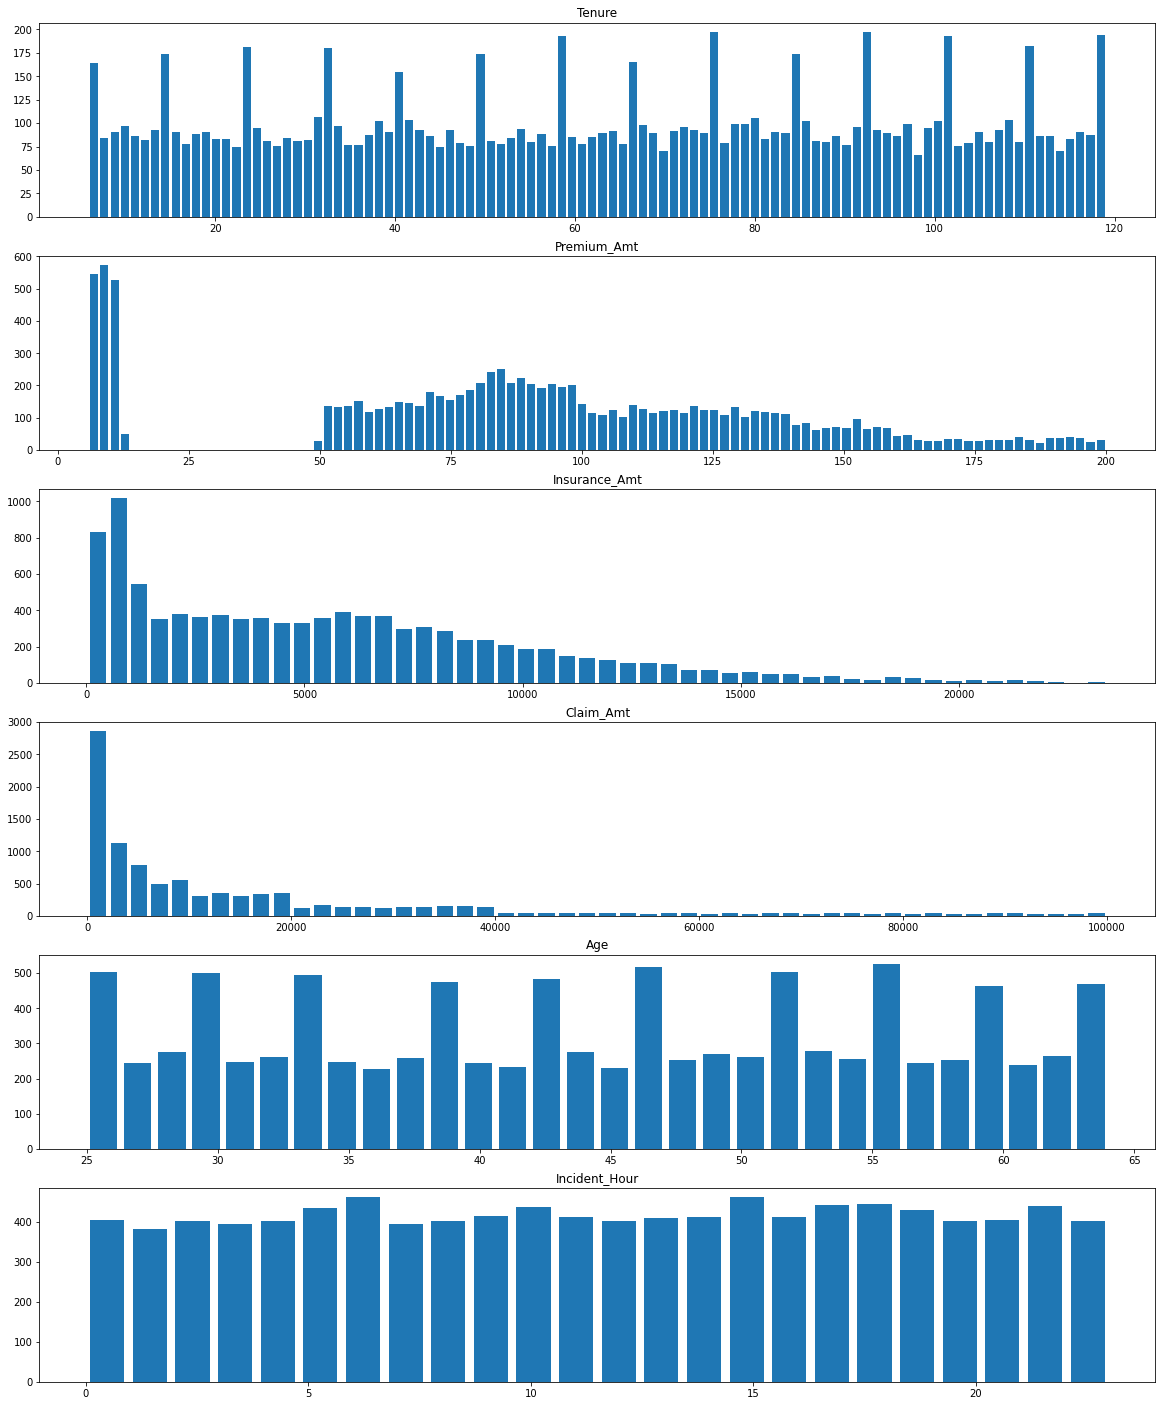

In [49]:
# Plotting distribution of continuous feautres
plt.figure(figsize=(20,25))
plt.subplot(6,1,1)
plt.title("Tenure")
plt.hist(df["Tenure"], histtype="bar", bins= 100, rwidth=0.8);
plt.subplot(6,1,2)
plt.title("Premium_Amt")
plt.hist(df["Premium_Amt"], histtype="bar", bins= 100, rwidth=0.8);
plt.subplot(6,1,3)
plt.title("Insurance_Amt")
plt.hist(df["Insurance_Amt"], histtype="bar", bins= 50, rwidth=0.8);
plt.subplot(6,1,4)
plt.title("Claim_Amt")
plt.hist(df["Claim_Amt"], histtype="bar", bins= 50, rwidth=0.8);
plt.subplot(6,1,5)
plt.title("Age")
plt.hist(df["Age"], histtype="bar", bins= 30, rwidth=0.8);
plt.subplot(6,1,6)
plt.title("Incident_Hour")
plt.hist(df["Incident_Hour"], histtype="bar", bins= 24, rwidth=0.8);

In [50]:
# date_time function gives time in days between two dates, used to extract information from date data
import datetime
from math import floor
def date_time(x,y):
    a = datetime.date(eval(x[0:4]), np.int64(x[5:7]), np.int64(x[8:10]))
    b = datetime.date(eval(y[0:4]), np.int64(y[5:7]), np.int64(y[8:10]))
    return (a-b).days

In [51]:
# Extracting information from date data
df["Months_Policy_Loss"] = [floor(date_time(df.loc[i,"Loss_DT"], df.loc[i,"Policy_DT"])/30) for i in range(10000)]
df["Days_Loss_Report"] = [date_time(df.loc[i,"Report_DT"], df.loc[i,"Loss_DT"]) for i in range(10000)]
df["Days_Report_TXN"] = [date_time(df.loc[i,"TXN_DT"], df.loc[i,"Report_DT"]) for i in range(10000)]

In [52]:
# Dropping the date columns as necessary information is extracted
df = df.drop(["TXN_DT", "Policy_DT", "Loss_DT", "Report_DT"], axis= 1)

In [53]:
df["Address"]

0        7701 West Saint John Road
1             8595 West 81st Drive
2              637 Britannia Drive
3                 2803 River Drive
4              7573 National Drive
                   ...            
9995             126 Marjorie Lane
9996         501 West Maple Street
9997           10980 Splendor Loop
9998                   19 Heritage
9999    3516 North Virginia Avenue
Name: Address, Length: 10000, dtype: object

In [54]:
# mask = [df2["ADDRESS_LINE1"][i] == df["Address"][i] for i in range(600)]
# df2[mask]

In [55]:
# df.loc[:,["TXN_ID","Customer_ID", "Agent_ID","Vendor_ID"]][df["Vendor_ID"] == "VNDR00451"]

In [56]:
# Using city columns to extract information whether the city and incident city have same values
df_new_city = df[["City", "Incident_City"]].assign(Same_City=0)

for i in range(10000):    
    lst = set()
    for j in df_new_city.columns[:-1]:
            lst.add(df_new_city.loc[i,j])
    if len(lst) == 1:
        df_new_city.iloc[i,-1] =+ 1
df_new_city = df_new_city[["Same_City"]]
df_new_city = df_new_city.assign(TXN_ID = range(1,10001))
df = df.merge(df_new_city, how= "inner", on = "TXN_ID")

In [57]:
# Using state columns to extract information whether the city and incident city have same values
df_new_state = df[["State", "Incident_State"]].assign(Same_State=0)

for i in range(10000):    
    lst = set()
    for j in df_new_state.columns[:-1]:
            lst.add(df_new_state.loc[i,j])
    if len(lst) == 1:
        df_new_state.iloc[i,-1] =+ 1
df_new_state = df_new_state[["Same_State"]]
df_new_state = df_new_state.assign(TXN_ID = range(1,10001))
df = df.merge(df_new_state, how= "inner", on = "TXN_ID")

In [58]:
# One hot encoding Insurance type
OHE_Insurance_Type = pd.get_dummies(df["Insurance_Type"], dtype= np.int64)
df = pd.concat([df,OHE_Insurance_Type], axis = 1, join = "inner")

# One hot encoding Risk
df["Risk"] = df["Risk"].replace({"L":"Risk_Low","M":"Risk_Mid", "H":"Risk_High"})
OHE_Risk = pd.get_dummies(df["Risk"], dtype = np.int64)
df = pd.concat([df,OHE_Risk], axis = 1, join = "inner")

# One hot encoding House
OHE_House = pd.get_dummies(df["House"], dtype = np.int64)
df = pd.concat([df,OHE_House], axis = 1, join = "inner")

# One hot encoding Social Class
OHE_Social_Class = pd.get_dummies(df["Social_Class"], dtype = np.int64)
df = pd.concat([df,OHE_Social_Class], axis = 1, join = "inner")

# One hot encoding Ed
OHE_Ed = pd.get_dummies(df["Ed"], dtype = np.int64)
df = pd.concat([df,OHE_Ed], axis = 1, join = "inner")

# One hot encoding Severity
df["Severity"] = df["Severity"].replace({"Total Loss":"Total_Loss", "Major Loss":"Major_Loss", "Minor Loss": "Minor_Loss"})
OHE_Severity = pd.get_dummies(df["Severity"], dtype = np.int64)
df = pd.concat([df,OHE_Severity], axis = 1, join = "inner")

# One hot encoding Authority
df["Authority"] = df["Authority"].replace({"Ambulance":"Contact_Ambulance",
"Police":"Contact_Police", "None": "Contact_None", "Other": "Contact_Other"})
OHE_Authority = pd.get_dummies(df["Authority"], dtype = np.int64)
df = pd.concat([df,OHE_Authority], axis = 1, join = "inner")

In [59]:
df = df.drop(["Insurance_Type", "Risk", "House", "Social_Class", "Ed", "Severity", "Authority"], axis = 1)

In [60]:
df.head()

,TXN_ID,Customer_ID,Agent_ID,Vendor_ID,Policy_No,Age,State,Incident_State,City,Incident_City,...,MD,Masters,PhD,Major_Loss,Minor_Loss,Total_Loss,Contact_Ambulance,Contact_None,Contact_Other,Contact_Police
0,1,3822,413,VNDR00556,8468,54,AZ,GA,Glendale,Savannah,...,0,0,0,1,0,0,0,0,0,1
1,2,8149,769,VNDR00592,9594,61,CO,AL,Arvada,Montgomery,...,0,0,0,0,0,1,1,0,0,0
2,3,3172,883,VNDR00031,7969,47,CA,CO,Vallejo,Grand Junction,...,0,0,1,0,0,1,0,0,0,1
3,4,7572,278,VNDR00075,9292,36,GA,GA,Thunderbolt,Savannah,...,0,1,0,0,1,0,1,0,0,0
4,5,8173,636,VNDR00472,204,51,CA,TN,Livermore,Nashville,...,0,1,0,1,0,0,0,0,0,1


---

In [61]:
# Importing employee data
df_emp = pd.read_csv("https://raw.githubusercontent.com/waitasecant/Insurance-Claims-Fraud-/main/employee_data.csv")
df_emp.shape

(1200, 10)

In [62]:
# Renaming collumns appropriately
df_emp = df_emp.rename(columns = {'AGENT_ID':'Agent_ID', 'AGENT_NAME':'Agent_Name',
        'DATE_OF_JOINING':'DoJ', 'ADDRESS_LINE1':'Emp_Address', 'ADDRESS_LINE2':'Emp_Address2',
        'CITY':'Emp_City', 'STATE':'Emp_State', 'POSTAL_CODE':'Emp_Postal_Code',
        'EMP_ROUTING_NUMBER':'Emp_Routing_No', 'EMP_ACCT_NUMBER':'Emp_Account_No'})
df_emp = df_emp.drop("Emp_Address2", axis= 1)

In [63]:
# Extracting indexes from Agent_ID
df_emp["Agent_ID"] = [d[5:10] for d in df_emp["Agent_ID"]]
remove_zeros(df_emp, "Agent_ID")

In [64]:
df_emp.head()

,Agent_ID,Agent_Name,DoJ,Emp_Address,Emp_City,Emp_State,Emp_Postal_Code,Emp_Routing_No,Emp_Account_No
0,1,Ray Johns,1993-06-05,1402 Maggies Way,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,2,Angelo Borjon,2005-12-27,414 Tanya Pass,Panama City,FL,32404,107363763,OPIS19290040088204
2,3,Candy Spellman,2003-09-02,606 National Street,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,4,Mary Smith,2004-09-23,235 Hugh Thomas Drive,Panama City,FL,32404,67563771,ZANG21285355574581
4,5,Mildred Diaz,2011-06-21,3426 Broadview Street,Montgomery,AL,36110,114951317,DZFS82244494451134


In [65]:
# Creating a ordered list containing Agent IDs corresponding to df
agent_id = {}
for i in range(10000):
    agent_id[df["Agent_ID"][i]] = 0
agent_id = list(agent_id.keys())

In [66]:
# Creating a copy of df_emp
df_emp_copy = df_emp.copy()

In [67]:
# Adjusting rows of df_emp accordingly to optimize the following loops
for i in range(1200):
    df_emp_copy.loc[i] = df_emp.loc[agent_id[i]-1]
df_emp = df_emp_copy

In [68]:
df_emp.head()

,Agent_ID,Agent_Name,DoJ,Emp_Address,Emp_City,Emp_State,Emp_Postal_Code,Emp_Routing_No,Emp_Account_No
0,413,Amy Wangler,1994-01-06,584 Rural Hill Road,Nashville,TN,37217,35441155,LRZO53254369804934
1,769,Jessica Montez,2004-05-28,6114 West Glenn Drive,Glendale,AZ,85301,44055451,XBYG14382904542874
2,883,Howard Smith,2004-08-01,2500 Snowdoun Chambers Road,Montgomery,AL,36105,55770246,WRXH14597428306333
3,278,Patricia Tucker,2007-06-12,313 Lone Oak Drive,Norman,OK,73071,87652976,YEPN16077902472499
4,636,Brenda Bean,2010-01-19,120 Wells Avenue,Glen Burnie,MD,21061,76119019,HZBK86544578578547


In [69]:
# for i in range(10000):
#     for j in range(1200):
#         if df["Agent_ID"][i] == df_emp["Agent_ID"][j]:
#             if df.loc[i,"Postal_Code"] == df_emp.loc[j,"Emp_Postal_Code"]:
#                 print(i,j)
#     continue

In [70]:
df_emp.loc[[631],["Emp_Address", "Emp_City", "Emp_State", "Emp_Postal_Code", "Agent_ID"]]

,Emp_Address,Emp_City,Emp_State,Emp_Postal_Code,Agent_ID
631,1405 Tolkien Drive,Conway,AR,72034,873


In [71]:
df.loc[[9292],["Address", "City", "State","Postal_Code", "Agent_ID", "TXN_ID"]]

,Address,City,State,Postal_Code,Agent_ID,TXN_ID
9292,1405 Tolkien Drive,Conway,AR,72034,873,9293


In [72]:
# Adding employee data columns to df, which have common entries to customer data
# There are common Address, City, State, Postal_Code data between employee and customer
for k in ["Emp_Address", "Emp_City", "Emp_State", "Emp_Postal_Code"]:
    df[k] = 0
    for i in range(10000):
        for j in range(1200):
            if df["Agent_ID"][i] == df_emp["Agent_ID"][j]:
                df[k][i] = df_emp[k][j]
        continue

In [83]:
df.head()

,TXN_ID,Customer_ID,Agent_ID,Vendor_ID,Policy_No,Age,State,Incident_State,City,Incident_City,...,Minor_Loss,Total_Loss,Contact_Ambulance,Contact_None,Contact_Other,Contact_Police,Emp_Address,Emp_City,Emp_State,Emp_Postal_Code
0,1,3822,413,VNDR00556,8468,54,AZ,GA,Glendale,Savannah,...,0,0,0,0,0,1,584 Rural Hill Road,Nashville,TN,37217
1,2,8149,769,VNDR00592,9594,61,CO,AL,Arvada,Montgomery,...,0,1,1,0,0,0,6114 West Glenn Drive,Glendale,AZ,85301
2,3,3172,883,VNDR00031,7969,47,CA,CO,Vallejo,Grand Junction,...,0,1,0,0,0,1,2500 Snowdoun Chambers Road,Montgomery,AL,36105
3,4,7572,278,VNDR00075,9292,36,GA,GA,Thunderbolt,Savannah,...,1,0,1,0,0,0,313 Lone Oak Drive,Norman,OK,73071
4,5,8173,636,VNDR00472,204,51,CA,TN,Livermore,Nashville,...,0,0,0,0,0,1,120 Wells Avenue,Glen Burnie,MD,21061


---

In [74]:
# Importing vendor data
df_vnd = pd.read_csv("https://raw.githubusercontent.com/waitasecant/Insurance-Claims-Fraud-/main/vendor_data.csv")
df_vnd.shape

(600, 7)

In [75]:
# Renaming columns appropriately
df_vnd = df_vnd.rename(columns = {'VENDOR_ID':'Vendor_ID', 'VENDOR_NAME':'Vnd_Name',
        'ADDRESS_LINE1':'Vnd_Address', 'ADDRESS_LINE2':'Vnd_Address2', 'CITY':'Vnd_City',
       'STATE':'Vnd_State', 'POSTAL_CODE':'Vnd_Postal_Code'})
df_vnd = df_vnd.drop("Vnd_Address2", axis= 1)

In [76]:
df_vnd.head()

,Vendor_ID,Vnd_Name,Vnd_Address,Vnd_City,Vnd_State,Vnd_Postal_Code
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,Nashville,TN,37210


In [77]:
df["Vendor_ID"].isnull().sum()

3245

In [85]:
# Creating a copy od original data frame
df_copy = df.copy()

In [86]:
# New merged data frame with vendor data
df_merged = pd.merge(df_copy, df_vnd, on='Vendor_ID', how='left')

In [94]:
df_merged.head()

,TXN_ID,Customer_ID,Agent_ID,Vendor_ID,Policy_No,Age,State,Incident_State,City,Incident_City,...,Contact_Police,Emp_Address,Emp_City,Emp_State,Emp_Postal_Code,Vnd_Name,Vnd_Address,Vnd_City,Vnd_State,Vnd_Postal_Code
0,1,3822,413,VNDR00556,8468,54,AZ,GA,Glendale,Savannah,...,1,584 Rural Hill Road,Nashville,TN,37217,Ramsey Inc,3114 West 20th Court,Panama City,FL,32405.0
1,2,8149,769,VNDR00592,9594,61,CO,AL,Arvada,Montgomery,...,0,6114 West Glenn Drive,Glendale,AZ,85301,"Morales, Campbell and Washington",42 West Louise Street,Fayetteville,AR,72701.0
2,3,3172,883,VNDR00031,7969,47,CA,CO,Vallejo,Grand Junction,...,1,2500 Snowdoun Chambers Road,Montgomery,AL,36105,Johnson Ltd,2619 North Quality Lane,Fayetteville,AR,72703.0
3,4,7572,278,VNDR00075,9292,36,GA,GA,Thunderbolt,Savannah,...,0,313 Lone Oak Drive,Norman,OK,73071,Blackwell-Foster,3609 Meadow Drive,Nashville,TN,37215.0
4,5,8173,636,VNDR00472,204,51,CA,TN,Livermore,Nashville,...,1,120 Wells Avenue,Glen Burnie,MD,21061,Evans-Scott,4001 19th Place Northeast,Washington,DC,20018.0


In [127]:
# df.loc[:,['Same_State']][df_merged.loc[:,"Vendor_ID"].isna()].sum()

In [95]:
df_merged.loc[[22],["Vendor_ID", "City", "State", "Address", "Postal_Code"]]

,Vendor_ID,City,State,Address,Postal_Code
22,VNDR00375,Panama City Beach,FL,17109 Guava Avenue,32413


In [96]:
df_vnd.loc[[374],["Vendor_ID", "Vnd_City", "Vnd_State", "Vnd_Address", "Vnd_Postal_Code"]]

,Vendor_ID,Vnd_City,Vnd_State,Vnd_Address,Vnd_Postal_Code
374,VNDR00375,Panama City Beach,FL,14854 Bay View Circle,32413


In [97]:
# for i in range(10000):
#     for j in range(600):
#         if df["Vendor_ID"][i] == df_vnd["Vendor_ID"][j]:
#             if df.loc[i,"Address"] == df_vnd.loc[j,"Vnd_Address"]:
#                 print(i,j)
#     continue

In [98]:
# df.loc[:,["TXN_ID", "Agent_ID", "Vendor_ID"]][df["Vendor_ID"] == "VNDR00451"]